<a href="https://colab.research.google.com/github/Susanarias/TAREA2/blob/main/6_The_MA_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
from math import sqrt
import seaborn as sns
sns.set()

Importing the Data and Pre-processing

In [ ]:
raw_csv_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Index_modified.csv")
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [ ]:
df_comp['market_value']=df_comp.ftse

In [ ]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

The LLR Test

In [ ]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

In [ ]:
import warnings
warnings.filterwarnings("ignore")

Creating Returns

In [ ]:
df['returns'] = df.market_value.pct_change(1)*100


ACF for Returns

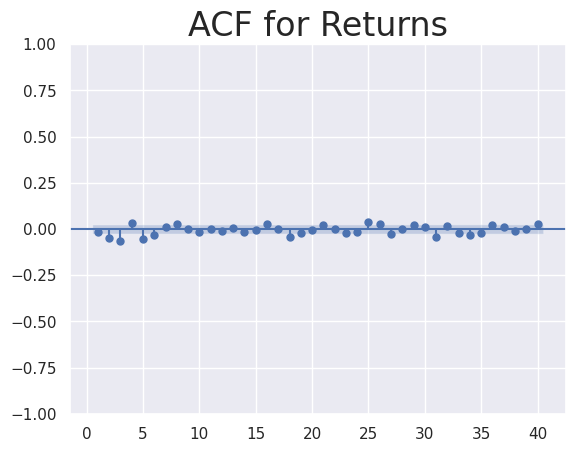

In [ ]:
sgt.plot_acf(df.returns[1:], zero = False, lags = 40)
plt.title("ACF for Returns", size=24)
plt.show()

MA(1) for Returns

In [ ]:
model_ret_ma_1 = ARIMA(df.returns[1:], order=(0,1,0))
results_ret_ma_1 = model_ret_ma_1.fit()
results_ret_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 6209
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -11728.346
Date:                Sat, 14 Oct 2023   AIC                          23458.691
Time:                        22:03:58   BIC                          23465.425
Sample:                    01-10-1994   HQIC                         23461.025
                         - 10-26-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         2.5615      0.022    117.990      0.000       2.519       2.604
===================================================================================
Ljung-Box (L1) (Q):                1460.92   Jarque-Bera (JB):             12755.15
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                             0.43
Prob(H) (two-sided):                  0.01   Kurtosis:                         9.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Higher-Lag MA Models for Returns

In [ ]:
model_ret_ma_2 = ARIMA(df.returns[1:], order=(0,2,0))
results_ret_ma_2 = model_ret_ma_2.fit()
print(results_ret_ma_2.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_1, model_ret_ma_2)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6209
Model:                 ARIMA(0, 2, 0)   Log Likelihood              -15105.097
Date:                Sat, 14 Oct 2023   AIC                          30212.194
Time:                        22:04:06   BIC                          30218.927
Sample:                    01-10-1994   HQIC                         30214.528
                         - 10-26-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         7.6083      0.068    111.130      0.000       7.474       7.742
Ljung-Box (L1) (Q):                2714.03   Jarque-Bera (JB):              9191.27
Prob(Q):                              0.00   Pr

In [ ]:
model_ret_ma_3 = ARIMA(df.returns[1:], order=(0,3,0))
results_ret_ma_3 = model_ret_ma_3.fit()
print(results_ret_ma_3.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_2, model_ret_ma_3)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6209
Model:                 ARIMA(0, 3, 0)   Log Likelihood              -18828.552
Date:                Sat, 14 Oct 2023   AIC                          37659.104
Time:                        22:05:20   BIC                          37665.837
Sample:                    01-10-1994   HQIC                         37661.438
                         - 10-26-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        25.2796      0.230    109.847      0.000      24.829      25.731
Ljung-Box (L1) (Q):                3517.79   Jarque-Bera (JB):              8652.28
Prob(Q):                              0.00   Pr

In [ ]:
model_ret_ma_4 = ARIMA(df.returns[1:], order=[0,4,0])
results_ret_ma_4 = model_ret_ma_4.fit()
print(results_ret_ma_4.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_3, model_ret_ma_4)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6209
Model:                 ARIMA(0, 4, 0)   Log Likelihood              -22717.419
Date:                Sat, 14 Oct 2023   AIC                          45436.838
Time:                        22:05:26   BIC                          45443.571
Sample:                    01-10-1994   HQIC                         45439.172
                         - 10-26-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        88.6266      0.814    108.850      0.000      87.031      90.222
Ljung-Box (L1) (Q):                4052.83   Jarque-Bera (JB):              8219.02
Prob(Q):                              0.00   Pr

In [ ]:
model_ret_ma_5 = ARIMA(df.returns[1:], order=[0,5,0])
results_ret_ma_5 = model_ret_ma_5.fit()
print(results_ret_ma_5.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_4, model_ret_ma_5)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6209
Model:                 ARIMA(0, 5, 0)   Log Likelihood              -26701.403
Date:                Sat, 14 Oct 2023   AIC                          53404.806
Time:                        22:05:48   BIC                          53411.538
Sample:                    01-10-1994   HQIC                         53407.140
                         - 10-26-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       320.5153      2.942    108.963      0.000     314.750     326.281
Ljung-Box (L1) (Q):                4424.15   Jarque-Bera (JB):              8269.31
Prob(Q):                              0.00   Pr

In [ ]:
model_ret_ma_6 = ARIMA(df.returns[1:], order=[0,6,0])
results_ret_ma_6 = model_ret_ma_6.fit()
print(results_ret_ma_6.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_5, model_ret_ma_6)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6209
Model:                 ARIMA(0, 6, 0)   Log Likelihood              -30745.731
Date:                Sat, 14 Oct 2023   AIC                          61493.463
Time:                        22:06:06   BIC                          61500.195
Sample:                    01-10-1994   HQIC                         61495.797
                         - 10-26-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1182.4044     10.811    109.373      0.000    1161.216    1203.593
Ljung-Box (L1) (Q):                4691.09   Jarque-Bera (JB):              8438.45
Prob(Q):                              0.00   Pr

In [ ]:
model_ret_ma_7 = ARIMA(df.returns[1:], order=[0,7,0])
results_ret_ma_7 = model_ret_ma_7.fit()
print(results_ret_ma_7.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_6, model_ret_ma_7)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6209
Model:                 ARIMA(0, 7, 0)   Log Likelihood              -34830.779
Date:                Sat, 14 Oct 2023   AIC                          69663.559
Time:                        22:06:23   BIC                          69670.291
Sample:                    01-10-1994   HQIC                         69665.893
                         - 10-26-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4421.4966     40.176    110.053      0.000    4342.753    4500.240
Ljung-Box (L1) (Q):                4889.15   Jarque-Bera (JB):              8727.76
Prob(Q):                              0.00   Pr

In [ ]:
model_ret_ma_7 = ARIMA(df.returns[1:], order=[0,7,0])
results_ret_ma_7 = model_ret_ma_7.fit()
print(results_ret_ma_7.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_6, model_ret_ma_7)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6209
Model:                 ARIMA(0, 7, 0)   Log Likelihood              -34830.779
Date:                Sat, 14 Oct 2023   AIC                          69663.559
Time:                        22:06:52   BIC                          69670.291
Sample:                    01-10-1994   HQIC                         69665.893
                         - 10-26-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4421.4966     40.176    110.053      0.000    4342.753    4500.240
Ljung-Box (L1) (Q):                4889.15   Jarque-Bera (JB):              8727.76
Prob(Q):                              0.00   Pr

In [ ]:
model_ret_ma_8 = ARIMA(df.returns[1:], order=[0,8,0])
results_ret_ma_8 = model_ret_ma_8.fit()
print(results_ret_ma_8.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_7, model_ret_ma_8)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6209
Model:                 ARIMA(0, 8, 0)   Log Likelihood              -38944.587
Date:                Sat, 14 Oct 2023   AIC                          77891.174
Time:                        22:07:30   BIC                          77897.907
Sample:                    01-10-1994   HQIC                         77893.509
                         - 10-26-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.667e+04    150.227    110.989      0.000    1.64e+04     1.7e+04
Ljung-Box (L1) (Q):                5040.48   Jarque-Bera (JB):              9072.60
Prob(Q):                              0.00   Pr

In [ ]:
LLR_test(model_ret_ma_6, model_ret_ma_8, DF = 2)

1.0

Residuals for Returns

In [ ]:
df['res_ret_ma_8'] = results_ret_ma_8.resid[1:]

In [ ]:
print("The mean of the residuals is " + str(round(df.res_ret_ma_8.mean(),3)) + "\nThe variance of the residuals is " + str(round(df.res_ret_ma_8.var(),3)))


The mean of the residuals is 0.003
The variance of the residuals is 16679.202


In [ ]:
round(sqrt(df.res_ret_ma_8.var()),3)

129.148

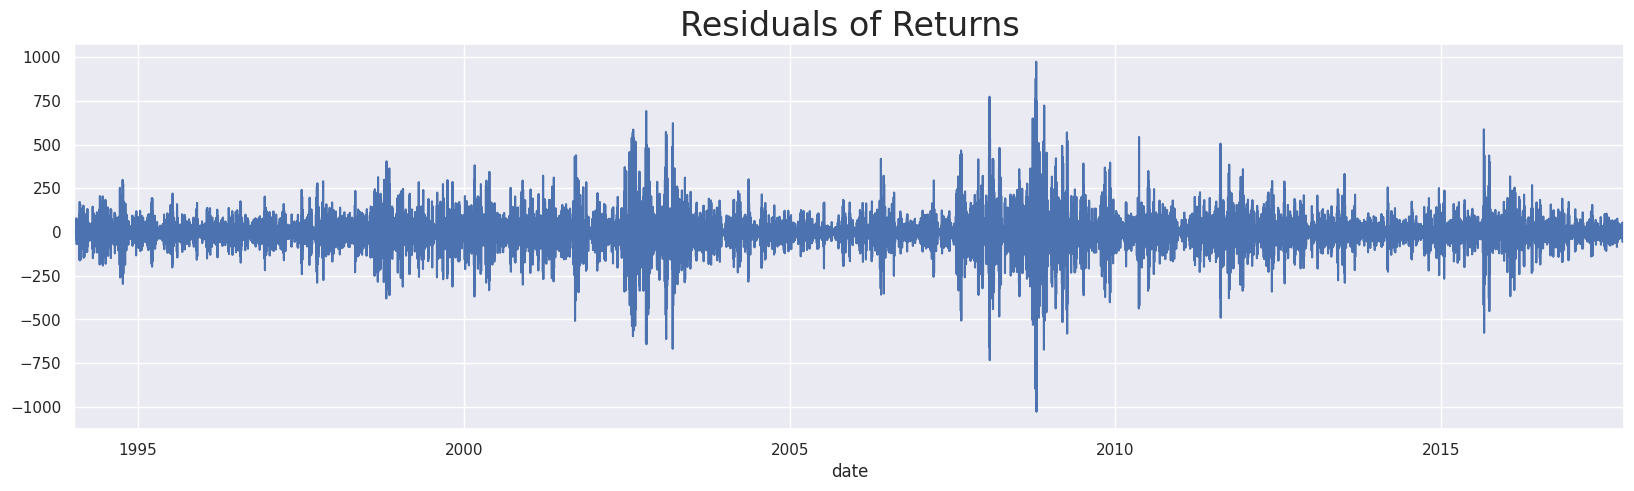

In [ ]:
df.res_ret_ma_8[1:].plot(figsize = (20,5))
plt.title("Residuals of Returns", size = 24)
plt.show()

In [ ]:
sts.adfuller(df.res_ret_ma_8[2:])

(-57.849552709216155,
 0.0,
 34,
 6173,
 {'1%': -3.431409779903747,
  '5%': -2.862008327707909,
  '10%': -2.5670192880359903},
 28935.27957138801)

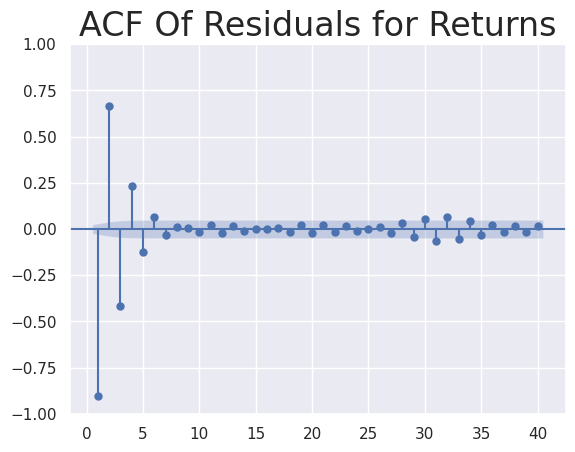

In [ ]:
sgt.plot_acf(df.res_ret_ma_8[2:], zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()

Normalized Returns

In [ ]:
bench_ret = df.returns.iloc[1]
df['norm_ret'] = df.returns.div(bench_ret).mul(100)

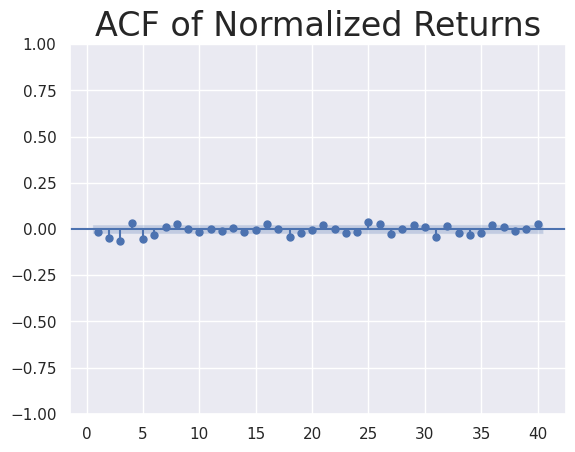

In [ ]:
sgt.plot_acf(df.norm_ret[1:], zero = False, lags = 40)
plt.title("ACF of Normalized Returns",size=24)
plt.show()

In [ ]:
model_norm_ret_ma_8 = ARIMA(df.norm_ret[1:], order=(0,8,0))
results_norm_ret_ma_8 = model_norm_ret_ma_8.fit()
results_norm_ret_ma_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 6209
Model:                 ARIMA(0, 8, 0)   Log Likelihood              -78994.147
Date:                Sat, 14 Oct 2023   AIC                         157990.293
Time:                        22:14:41   BIC                         157997.026
Sample:                    01-10-1994   HQIC                        157992.627
                         - 10-26-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       6.79e+09   6.12e+07    110.989      0.000    6.67e+09    6.91e+09
===================================================================================
Ljung-Box (L1) (Q):                5040.48   Jarque-Bera (JB):              9072.60
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.94   Skew:                             0.00
Prob(H) (two-sided):                  0.18   Kurtosis:                         8.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
df['res_norm_ret_ma_8'] = results_ret_ma_8.resid[1:]

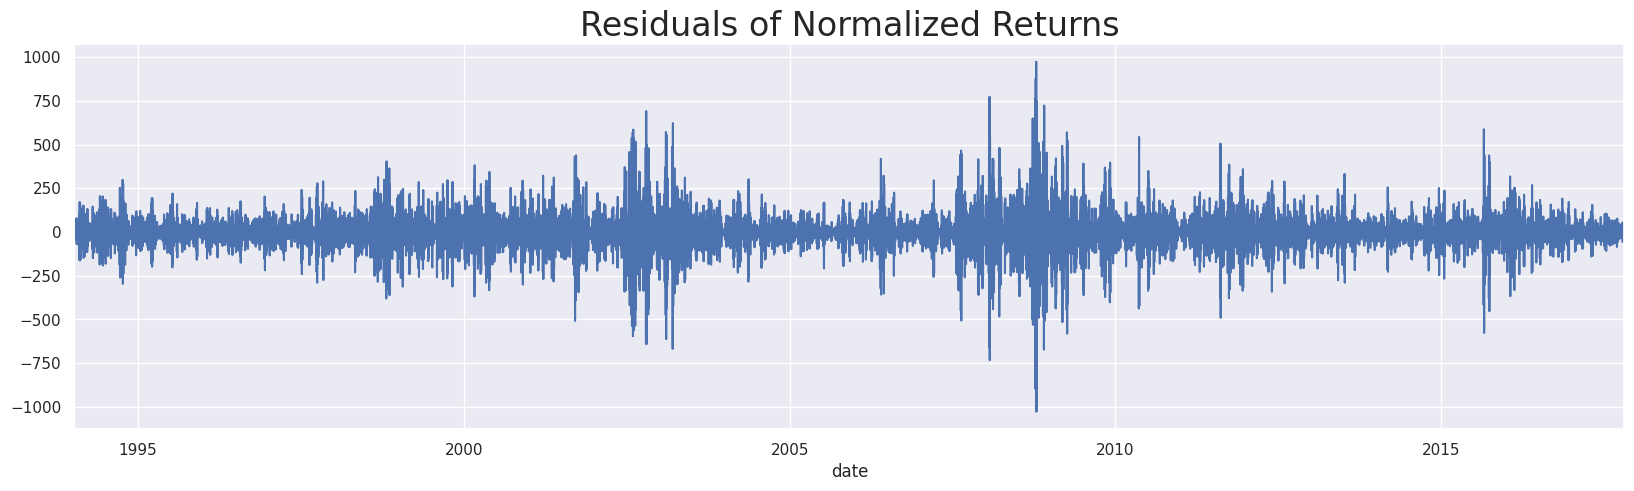

In [ ]:
df.res_norm_ret_ma_8[1:].plot(figsize=(20,5))
plt.title("Residuals of Normalized Returns",size=24)
plt.show()

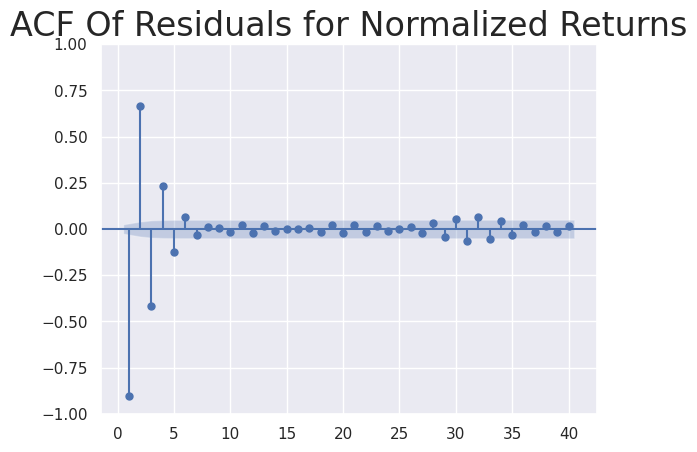

In [ ]:
sgt.plot_acf(df.res_norm_ret_ma_8[2:], zero = False, lags = 40)
plt.title("ACF Of Residuals for Normalized Returns",size=24)
plt.show()

MA Models For Prices

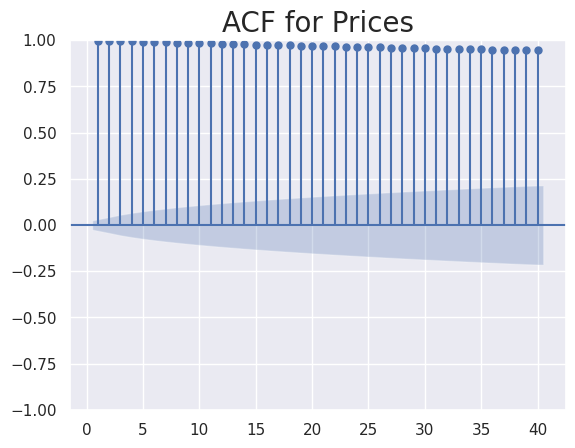

In [ ]:
sgt.plot_acf(df.market_value, zero = False, lags = 40)
plt.title("ACF for Prices", size=20)
plt.show()

In [ ]:
model_ma_1 = ARIMA(df.market_value, order=(0,1,0))
results_ma_1 = model_ma_1.fit()
results_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6210
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -34083.997
Date:                Sat, 14 Oct 2023   AIC                          68169.995
Time:                        22:16:06   BIC                          68176.728
Sample:                    01-07-1994   HQIC                         68172.329
                         - 10-26-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3431.8770     36.480     94.075      0.000    3360.377    3503.377
===================================================================================
Ljung-Box (L1) (Q):                   0.55   Jarque-Bera (JB):              3598.68
Prob(Q):                              0.46   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                            -0.19
Prob(H) (two-sided):                  0.13   Kurtosis:                         6.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""